In [1]:
import os
import numpy as np
import shutil
import time

In [2]:
data = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset"
labels = os.listdir(data)
labels = [labels[0],labels[3]]
print(labels)

['riped', 'Unriped']


In [3]:
samples_riped = os.listdir(r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\riped")
samples_unriped = os.listdir(r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\Unriped")
num_riped = len(samples_riped)
num_unriped = len(samples_unriped)
print(f"Riped Samples: {num_riped}, Unriped Samples: {num_unriped}")

Riped Samples: 260, Unriped Samples: 165


In [4]:
main_dataset_riped_path = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\riped"
main_dataset_unriped_path = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\Unriped"

train_riped_path = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\train\riped"
train_unriped_path = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\train\Uriped"

test_riped_path = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\test\riped"
test_unriped_path = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\test\Uriped"

Segregating images into training and test data

In [5]:

# # if not os.path.isdir(folder_name):
# #     os.makedirs(folder_name)
# mega_samp = [samples_riped, samples_unriped]
# target_1 = [test_riped_path, test_unriped_path]
# target_2 = [train_riped_path, train_unriped_path]
# track = 0
# count_1 = 0
# count_2 = 0
# for samp in mega_samp:
#     test_percent = int(len(samp) * 0.1)
#     test_cut = samp[round(len(samp) - test_percent):]
#     train_cut = samp[:round(len(samp) - test_percent)]
#     new_ = os.path.join(data, labels[track])
    
#     for i in test_cut:#Copying imgs to test folder
#         orig_1 = os.path.join(new_, i)
#         try:
#             shutil.copy(orig_1, target_1[track])
#             print(f"Copied {i} to {target_1[track]}")
#             count_1 += 1
#         except:
#             print(f"Unable to copy {i}...moving on")
#     print(f"{count_1} files copied to {target_1[track]}")
#     time.sleep(4)
    
#     for x in train_cut:#Copying imgs to train folder
#         orig_2 = os.path.join(new_, x)
#         try:
#             shutil.copy(orig_2, target_2[track])
#             print(f"Copied {x} to {target_2[track]}")
#             count_2 += 1
#         except:
#             print(f"Unable to copy {x}...moving on")
#     print(f"{count_2} files copied to {target_2[track]}")
#     time.sleep(4)
    
#     track += 1

# print("Dataset successfully split into train and test classes.")
        
    

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import PIL

In [27]:
train_pth = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\train"
valid_pth = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\valid"
test_pth = r"C:\Users\Samuel Mensah\RipeDetect\img_dataset\test"

In [28]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255)\
    .flow_from_directory(directory=train_pth, target_size=(224, 224), classes=['riped', 'Unriped'], batch_size=2)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255)\
    .flow_from_directory(directory=valid_pth, target_size=(224, 224), classes=['riped', 'Unriped'], batch_size=2)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255)\
    .flow_from_directory(directory=test_pth, target_size=(224, 224), classes=['riped', 'Unriped'], batch_size=2, shuffle=False)

Found 298 images belonging to 2 classes.
Found 45 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [18]:
imgs, labels = next(train_batches)

In [19]:
def plt_imgs(img_arr):
    fig, axes = plt.subplots(1, 2, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


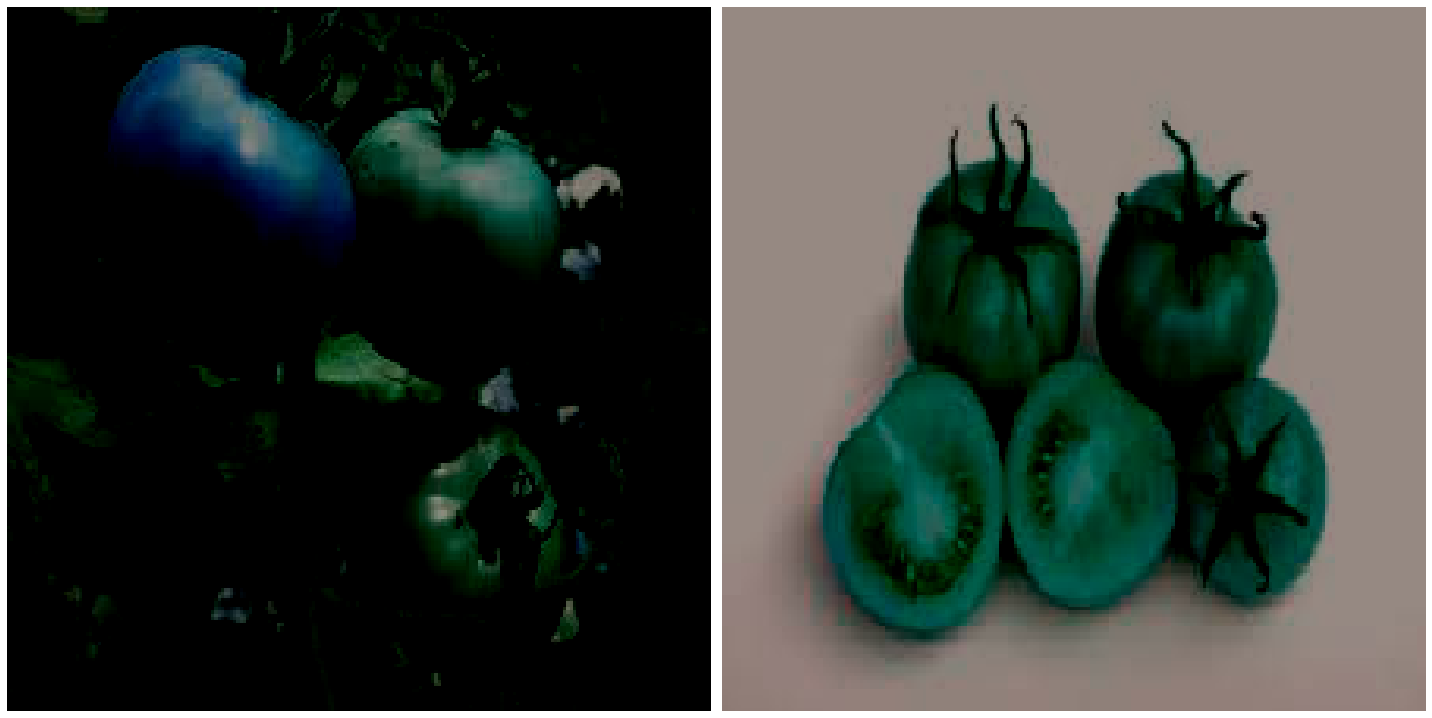

[[0. 1.]
 [0. 1.]]


In [20]:
plt_imgs(imgs)
print(labels)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix

In [30]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding= 'same', input_shape=(224, 224, 3) ),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding= 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=1)

Epoch 1/10
  4/149 [..............................] - ETA: 3:31 - loss: 0.6644 - accuracy: 0.6250

c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\PIL\TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  "Possibly corrupt EXIF data.  "


 10/149 [=>............................] - ETA: 4:07 - loss: 0.6353 - accuracy: 0.6500

c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\PIL\Image.py:2957: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


 11/149 [=>............................] - ETA: 4:07 - loss: 0.6059 - accuracy: 0.6818

UnknownError:  UnidentifiedImageError: cannot identify image file 'C:\\Users\\Samuel Mensah\\RipeDetect\\img_dataset\\train\\Unriped\\222.jpg'
Traceback (most recent call last):

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\tensorflow\python\ops\script_ops.py", line 244, in __call__
    ret = func(*args)

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 827, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 814, in wrapped_generator
    for data in generator_fn():

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 940, in generator_fn
    yield x[i]

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\keras_preprocessing\image\iterator.py", line 230, in _get_batches_of_transformed_samples
    interpolation=self.interpolation)

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\keras_preprocessing\image\utils.py", line 110, in load_img
    img = pil_image.open(path)

  File "c:\ProgramData\Anaconda3\envs\cronus\lib\site-packages\PIL\Image.py", line 2959, in open
    "cannot identify image file %r" % (filename if filename else fp)

PIL.UnidentifiedImageError: cannot identify image file 'C:\\Users\\Samuel Mensah\\RipeDetect\\img_dataset\\train\\Unriped\\222.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_2309]

Function call stack:
train_function
